In [6]:
#Import the appropriate libraries 
%matplotlib inline

import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate

In [7]:
# Task 1: Connect to a cluster
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_51"; Java(TM) SE Runtime Environment (build 1.8.0_51-b16); Java HotSpot(TM) 64-Bit Server VM (build 25.51-b03, mixed mode)
  Starting server from /Users/avniwadhwa/anaconda/h2o_jar/h2o.jar
  Ice root: /var/folders/64/4y6zt2l16v14j3mkwnd3cd580000gn/T/tmpbA_9F8
  JVM stdout: /var/folders/64/4y6zt2l16v14j3mkwnd3cd580000gn/T/tmpbA_9F8/h2o_avniwadhwa_started_from_python.out
  JVM stderr: /var/folders/64/4y6zt2l16v14j3mkwnd3cd580000gn/T/tmpbA_9F8/h2o_avniwadhwa_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster version:,3.10.0.8
H2O cluster version age:,1 month and 28 days
H2O cluster name:,H2O_from_python_avniwadhwa_lwcddv
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [8]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [9]:
# Task 2: Load data - 1 row per flight.  Has columns showing the origin,
# destination, departure and arrival time, carrier information, and
# whether the flight was delayed.
print("Import and Parse airlines data")
data = h2o.import_file(path='https://s3.amazonaws.com/h2o-airlines-unpacked/allyears2k.csv')
data.describe()

Import and Parse airlines data
Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%
Rows:43978
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0,17.0,14.0,-63.0,-16.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1997.5,1.40909090909,14.6010732639,3.82061485288,1345.84666138,1313.22286143,1504.63413038,1485.28916731,NaN,818.842989677,NaN,124.814529135,125.021562607,114.316111091,9.31711193698,10.0073906556,NaN,NaN,730.182190565,5.38136805953,14.1686341847,0.0246941652645,NaN,0.00247851198326,4.04780029106,0.289376469271,4.85503190418,0.0170155602821,7.62006045002,0.555755150302,0.525057983537
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,9.0,3949.0,3500.0,475.0,437.0,402.0,475.0,473.0,131.0,133.0,3365.0,128.0,254.0,1.0,3.0,1.0,369.0,201.0,323.0,14.0,373.0,1.0,1.0
sigma,6.34436090171,1.87471137134,9.17579042586,1.90501311913,465.340899124,476.251139993,484.347487904,492.750434123,NaN,777.404369164,NaN,73.9744416606,73.40159463,69.6363295151,29.8402219624,26.4388090429,NaN,NaN,578.43800823,4.20197993986,9.9050857472,0.155193141358,NaN,0.0497234872189,16.2057299045,4.41677989873,18.6197762215,0.403940182102,23.4875658741,0.496887288343,0.499377380318
zeros,0,0,0,0,0,569,0,569,724,0,2,0,0,0,1514,6393,59,172,0,623,557,42892,81,43869,7344,8840,7388,8914,7140,19537,20887
missing,0,0,0,0,1086,0,1195,0,0,0,32,1195,13,16649,1195,1086,0,0,35,16026,16024,0,9774,0,35045,35045,35045,35045,35045,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


In [10]:
# ----------

# 2- Data exploration and munging. Generate scatter plots 
# of various columns and plot fitted GLM model.

# Function to fit a GLM model and plot the fitted (x,y) values
def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()


glm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


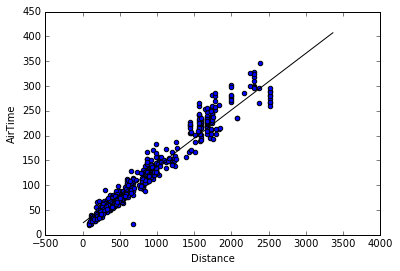

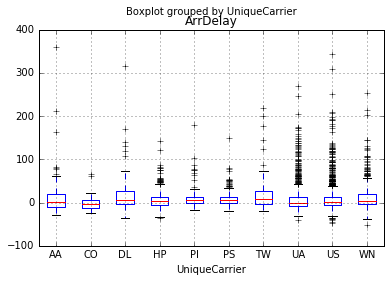

In [11]:
# Task 3: Generate scatterplots for "Distance" and "Airtime" and one for "Unique Carrier" and the "ArrDelay" 
scatter_plot(data, "Distance", "AirTime", fit = True)
scatter_plot(data, "UniqueCarrier", "ArrDelay", max_points = 5000, fit = False)

In [12]:
# Task 4: Use the .group_by function to group flights by month 
grouped = data.group_by("Month")
bpd = grouped.count().sum("Cancelled").frame
bpd.show()
bpd.describe()
bpd.dim


Month,sum_Cancelled,nrow_Year
1,1067,41979
10,19,1999


Rows:2
Cols:3




,Month,sum_Cancelled,nrow_Year
type,int,int,int
mins,1.0,19.0,1999.0
mean,5.5,543.0,21989.0
maxs,10.0,1067.0,41979.0
sigma,6.36396103068,741.047906684,28270.1291118
zeros,0,0,0
missing,0,0,0
0,1.0,1067.0,41979.0
1,10.0,19.0,1999.0


[2, 3]

In [13]:
# Task 5: Convert the "Year," "Month," "DayOfWeek," "Cancelled" columns to factors
data["Year"]      = data["Year"]     .asfactor()
data["Month"]     = data["Month"]    .asfactor()
data["DayOfWeek"] = data["DayOfWeek"].asfactor()
data["Cancelled"] = data["Cancelled"].asfactor()

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


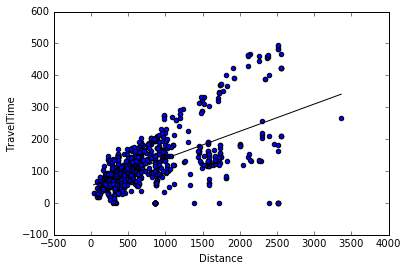

In [14]:
# Calculate and plot travel time
hour1 = data["CRSArrTime"] / 100
mins1 = data["CRSArrTime"] % 100
arrTime = hour1*60 + mins1

hour2 = data["CRSDepTime"] / 100
mins2 = data["CRSDepTime"] % 100
depTime = hour2*60 + mins2


data["TravelTime"] = (arrTime-depTime > 0).ifelse((arrTime-depTime), h2o.H2OFrame([[None]] * data.nrow))
scatter_plot(data, "Distance", "TravelTime")

glm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


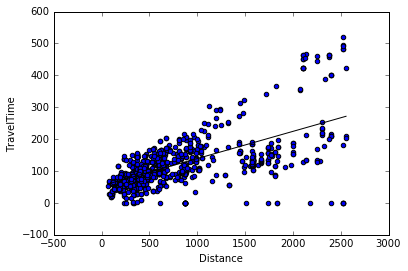

In [15]:
# Task 6: Impute missing travel times by the "Origin" and "Dest" columns and re-plot. 
data.impute(column = "Distance", by = ["Origin", "Dest"])
scatter_plot(data, "Distance", "TravelTime")

In [16]:
# Task 7: Create a test/train split
s = data["Year"].runif()
train = data[s <= 0.75]
test  = data[s > 0.75]

In [17]:
# Task 8: Set response variable and your choice of predictor variables
myY = "IsDepDelayed"
myX = ["Origin", "Dest", "Year", "UniqueCarrier", "DayOfWeek", "Month", "Distance", "FlightNum"]

In [18]:
# Task 9: Build simple GLM model

data_glm = H2OGeneralizedLinearEstimator(family="binomial", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)


glm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


In [19]:
# Task 10: Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        distribution   ="bernoulli",
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


In [21]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor        |   Normalized Coefficient |
|------------------+--------------------------|
| Year.2008        |               2.2753     |
| Origin.MDW       |               1.59798    |
| Origin.LIH       |               1.58654    |
| Year.2003        |               1.5712     |
| Year.2007        |               1.54556    |
| Origin.HPN       |               1.49538    |
| Dest.LYH         |               1.42463    |
| Origin.TRI       |               1.27143    |
| UniqueCarrier.HP |               1.27037    |
| Origin.CHO       |               1.23073    |
| Dest.HTS         |               1.19004    |
| Origin.TLH       |               1.16127    |
| Origin.GRR       |               1.11309    |
| Origin.CAE       |               1.06025    |
| Origin.LEX       |               1.05602    |
| Origin.BTV       |               1.05304    |
| Year.2001        |               1.03915    |
| Year.2002        |               1.02649    |
| UniqueCarrier.T

[(u'Year', 2488.348388671875, 1.0, 0.8448621291132427),
 (u'Origin', 456.92315673828125, 0.18362507389174645, 0.1551378708867574),
 (u'Month', 0.0, 0.0, 0.0),
 (u'DayOfWeek', 0.0, 0.0, 0.0),
 (u'UniqueCarrier', 0.0, 0.0, 0.0),
 (u'FlightNum', 0.0, 0.0, 0.0),
 (u'Dest', 0.0, 0.0, 0.0),
 (u'Distance', 0.0, 0.0, 0.0)]

In [23]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.235302092358
RMSE: 0.485079470147
LogLoss: 0.663377855491
Mean Per-Class Error: 0.370727837185
AUC: 0.660555546342
Gini: 0.321111092684
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.452153609952: 


,NO,YES,Error,Rate
NO,1302.0,3898.0,0.7496,(3898.0/5200.0)
YES,673.0,5125.0,0.1161,(673.0/5798.0)
Total,1975.0,9023.0,0.4156,(4571.0/10998.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4521536,0.6915863,22.0
max f2,0.4368915,0.8479087,23.0
max f0point5,0.5289965,0.6490574,13.0
max accuracy,0.5289965,0.6290235,13.0
max precision,0.6152128,0.7765625,2.0
max recall,0.4368915,1.0,23.0
max specificity,0.6314749,0.9463462,0.0
max absolute_mcc,0.5289965,0.2581650,13.0
max min_per_class_accuracy,0.5289965,0.6246982,13.0
max mean_per_class_accuracy,0.5289965,0.6292722,13.0


Gains/Lift Table: Avg response rate: 52.72 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1129296,0.6314749,1.4707545,1.4707545,0.7753623,0.7753623,0.1660918,0.1660918,47.0754533,47.0754533
,2,0.1811238,0.6004795,1.2898655,1.4026487,0.68,0.7394578,0.0879614,0.2540531,28.9865471,40.2648711
,3,0.2546827,0.5925332,1.3294440,1.3815053,0.7008653,0.7283113,0.0977923,0.3518455,32.9443979,38.1505324
,4,0.3347881,0.5605419,1.1152940,1.3178084,0.5879682,0.6947311,0.0893412,0.4411866,11.5293974,31.7808366
,5,0.4236225,0.5493723,1.1610265,1.2849309,0.6120778,0.6773986,0.1031390,0.5443256,16.1026479,28.4930945
,6,0.5024550,0.5289965,1.0195354,1.2432918,0.5374856,0.6554470,0.0803725,0.6246982,1.9535432,24.3291801
,7,0.6391162,0.4962577,0.7875191,1.1458346,0.4151697,0.6040689,0.1076233,0.7323215,-21.2480868,14.5834649
,8,0.7926896,0.4693631,0.8097317,1.0807190,0.4268798,0.5697408,0.1243532,0.8566747,-19.0268341,8.0719032
,9,0.8173304,0.4556774,1.0079261,1.0785245,0.5313653,0.5685838,0.0248362,0.8815109,0.7926133,7.8524475
,10,1.0,0.4368915,0.6486528,1.0,0.3419612,0.5271868,0.1184891,1.0,-35.1347189,0.0
